In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from tqdm.notebook import tqdm
import matplotlib.mlab as mlab
import scipy as sp

from commpy.utilities  import upsample
from optic.models import mzm, photodiode
from optic.metrics import signal_power
from optic.dsp import firFilter, pulseShape, lowPassFIR
from optic.core import parameters
from optic.plot import eyediagram
from optic.amplification import edfaSM, OSA

In [7]:
# simulation parameters
SpS = 16

Rs = 10e9 # Symbol rate (for OOK case Rs = Rb)
Tsymb = 1/Rs # Symbol period in seconds
Fs = 1/(Tsymb/SpS) # Signal sampling frequency (samples/second)
Ts = 1/Fs # Sampling period
Fc = 193.1e12

Pi_dBm = 0 # optical signal power at modulator input in dBm

# MZM parameters
Vπ = 2
Vb = -Vπ/2
Pi = 10**(Pi_dBm/10)*1e-3 # optical signal power in W at the MZM input

# generate pseudo-random bit sequence
bitsTx = np.random.randint(2, size=100000)
n = np.arange(0, bitsTx.size)

# map bits to electrical pulses
symbTx = 2*bitsTx-1
symbTx = symbTx/np.sqrt(signal_power(symbTx))

# upsampling
symbolsUp = upsample(symbTx, SpS)

# typical NRZ pulse
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

# pulse formatting
sigTx = firFilter(pulse, symbolsUp)

# optical modulation
Ai = np.sqrt(Pi)*np.ones(sigTx.size)
sigTxo = mzm(Ai, sigTx, Vπ, Vb)
sigTxo = np.reshape(sigTxo, (np.size(sigTxo), 1))

c:\Users\Adolfo\mambaforge\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


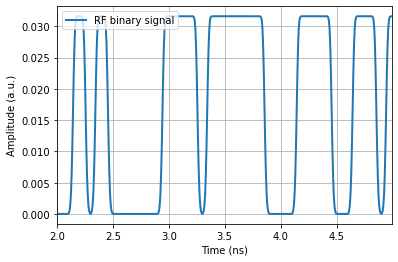

In [4]:
Ts = 1/Fs
interval = np.arange(16*20,16*50)
t = interval*Ts/1e-9
plt.plot(t, sigTxo[interval], label = 'RF binary signal', linewidth=2)
plt.ylabel('Amplitude (a.u.)')
plt.xlabel('Time (ns)')
plt.xlim(min(t),max(t))
plt.legend(loc='upper left')
plt.grid()

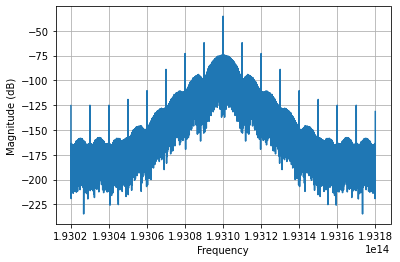

In [5]:
plt.figure()
plt.magnitude_spectrum(sigTxo, Fs=Fs, Fc = Fc, scale = 'dB', sides='twosided')
plt.grid()

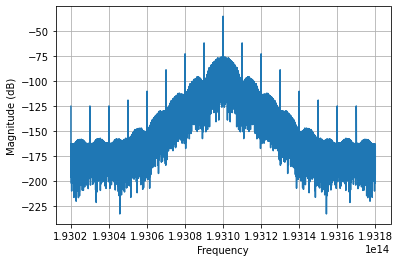

In [6]:
plt.magnitude_spectrum(sigTxo, Fs=Fs, Fc=Fc, scale = 'dB', window = mlab.window_none, sides='twosided')
plt.grid()

In [7]:
from optic.metrics import signal_power
print('Average power of the modulated optical signal [mW]: %.3f mW'%(signal_power(sigTxo)/1e-3))
print('Average power of the modulated optical signal [dBm]: %.3f dBm'%(10*np.log10(signal_power(sigTxo)/1e-3)))

Average power of the modulated optical signal [mW]: 0.498 mW
Average power of the modulated optical signal [dBm]: -3.025 dBm


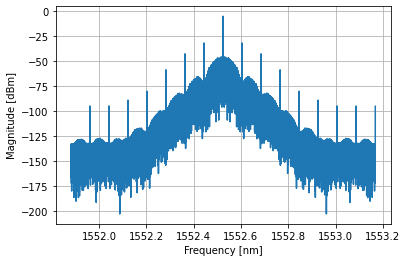

In [8]:
from scipy.constants import c
spec, freqs = mlab.magnitude_spectrum(sigTxo, Fs=Fs, window = mlab.window_none, sides='twosided')
freqs += Fc
Z = 10 * np.log10(1000*(spec**2))
line, = plt.plot(1e9*c/freqs, Z)
plt.xlabel('Frequency [nm]')
plt.ylabel('Magnitude [dBm]')
plt.grid()

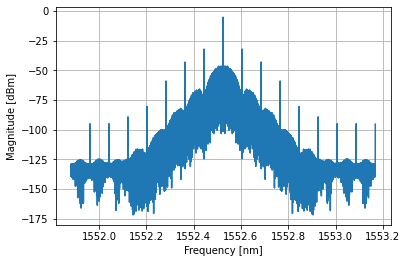

In [4]:
OSA(sigTxo, Fs, Fc)

In [8]:
param_edfa = parameters()
param_edfa.type  = "AGC"
param_edfa.value = 20
param_edfa.nf    = 5
param_edfa.forPump = {'pump_signal': (100e-3), 'pump_lambda': (980e-9)}
param_edfa.type = 'AGC'
param_edfa.file = '..\jupyter\giles_MP980.dat'
param_edfa.fileunit = 'nm'
param_edfa.gmtc = 'Bessel'

np.shape(sigTxo)
#Ei, param_edfa = edfaSM(sigTxo, Fs, Fc, param_edfa)

(1600000, 1)

In [20]:
param_edfa.forPump = {'pump_signal': (100e-3), 'pump_lambda': (980e-9)}
np.size(param_edfa.forPump['pump_signal'])

1